# Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC

In [60]:
x = np.array(np.random.randint(0, 5, size = 12))

In [61]:
x

array([1, 4, 0, 2, 3, 2, 0, 3, 3, 0, 0, 4])

In [62]:
x = x.reshape(6,2)

In [63]:
x

array([[1, 4],
       [0, 2],
       [3, 2],
       [0, 3],
       [3, 0],
       [0, 4]])

In [64]:
y = np.array(np.random.randint(7, 14, size = 12))

In [65]:
y = y.reshape(6,2)

In [66]:
y

array([[13,  8],
       [11,  7],
       [10,  7],
       [10, 13],
       [10, 13],
       [12, 11]])

In [67]:
z = np.vstack((x, y))

In [68]:
cl = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

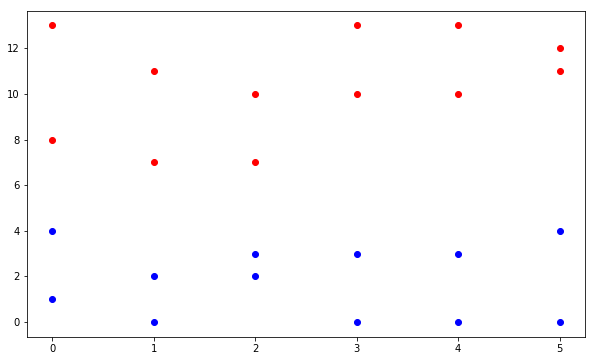

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(x, 'ro', color='blue')
plt.plot(y, 'ro', color='red')

In [70]:
svc = SVC()
svc.fit(z, cl)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
svc.predict([[8, 13]])

array([1])

In [74]:
svc.predict([[0, 3]])

array([0])

In [17]:
# installazione di mlxtend da terminale
# pip install mlxtend  

In [18]:
from mlxtend.plotting import plot_decision_regions

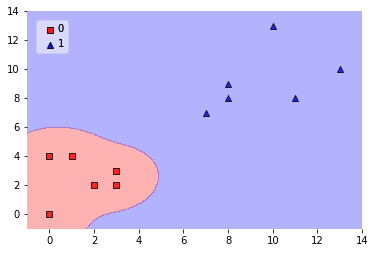

In [19]:
plot_decision_regions(z, cl, clf = svc, res = 0.02, legend = 2)

# Secondo esempio su dataset più grande

In [29]:
# importare dataset

In [30]:
# dataset tratto dal sito AnalyticsVidhya

In [3]:
df = pd.read_csv("Prostate_Cancer.csv")

In [4]:
print(df.head(5))

   id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [9]:
df.drop("id", axis = 1, inplace = True)

In [10]:
print(df.head(5))

  diagnosis_result  radius  texture  perimeter  area  smoothness  compactness  \
0                M      23       12        151   954       0.143        0.278   
1                B       9       13        133  1326       0.143        0.079   
2                M      21       27        130  1203       0.125        0.160   
3                M      14       16         78   386       0.070        0.284   
4                M       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059  


In [11]:
cl = {'B': 0, 'M': 1}
df['diagnosis_result'] = df['diagnosis_result'].map(cl)

In [12]:
print(df.head(5))

   diagnosis_result  radius  texture  perimeter  area  smoothness  \
0                 1      23       12        151   954       0.143   
1                 0       9       13        133  1326       0.143   
2                 1      21       27        130  1203       0.125   
3                 1      14       16         78   386       0.070   
4                 1       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [13]:
df.shape

(100, 9)

In [14]:
# importazione dei modelli

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:10], df['diagnosis_result'], test_size = 0.3)

In [19]:
x_train.shape

(70, 8)

In [20]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
pred = svc.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test, pred))

[[ 0  8]
 [ 0 22]]


In [24]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         8
          1       0.73      1.00      0.85        22

avg / total       0.54      0.73      0.62        30



/Users/valentinaporcu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# proviamo con nuovi parametri

In [26]:
parametri = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [27]:
# il kernel può essere anche 'poli', 'linear'

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(SVC(), parametri , refit = True, verbose = 3)

In [30]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5833333333333334, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5652173913043478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5652173913043478, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5833333333333334, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5652173913043478, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5652173913043478, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7083333333333334, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.6956521739130435, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7391304347826086, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [31]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [32]:
pred = grid.predict(x_test)

In [33]:
print(confusion_matrix(y_test, pred))

[[ 8  0]
 [ 4 18]]


In [34]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         8
          1       1.00      0.82      0.90        22

avg / total       0.91      0.87      0.87        30

